In [3]:
pip install shap

In [4]:
import pandas as pd
import shap
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://raw.githubusercontent.com/vijeth-sr/DSEM/main/mcd_menu.csv?token=GHSAT0AAAAAACPWR5LORKBQDTY3LTJMAR7AZPXVZPQ'
data = pd.read_csv(url)

# Assuming we are interested in 'Calories' as the target variable
y = data['Calories']
X = data.select_dtypes(include=np.number).drop('Calories', axis=1)  # Use only numeric columns and drop Calories

# Calculate the mean value of 'Calories'
print(f"Mean value of Calories: {y.mean():.2f}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, shuffle=True)


Mean value of Calories: 368.27


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the dataset
data_url = 'https://raw.githubusercontent.com/vijeth-sr/DSEM/main/mcd_menu.csv?token=GHSAT0AAAAAACPWR5LPJBYGDKKJI7FYBKCCZPXWRDA'
data = pd.read_csv(data_url)

# Prepare the data for modeling
target = 'Calories'
features = data.select_dtypes(include=['int64', 'float64']).columns.to_list()
features.remove(target)

X = data[features]
y = data[target]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Get the regression coefficients
coefficients = pd.DataFrame(linear_model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


                               Coefficient
Serving Size                     -0.000963
Calories from Fat                 0.162670
Total Fat                         2.451541
Total Fat (% Daily Value)         3.316348
Saturated Fat                    -1.169187
Saturated Fat (% Daily Value)     0.293519
Trans Fat                        -1.822693
Cholesterol                      -0.067484
Cholesterol (% Daily Value)       0.157318
Sodium                           -0.004592
Sodium (% Daily Value)           -0.038686
Carbohydrates                     4.440561
Carbohydrates (% Daily Value)    -0.946836
Dietary Fiber                     3.974022
Dietary Fiber (% Daily Value)    -1.229492
Sugars                           -0.217296
Protein                           4.030956
Vitamin A (% Daily Value)         0.009832
Vitamin C (% Daily Value)         0.056178
Calcium (% Daily Value)           0.154995
Iron (% Daily Value)              0.160931


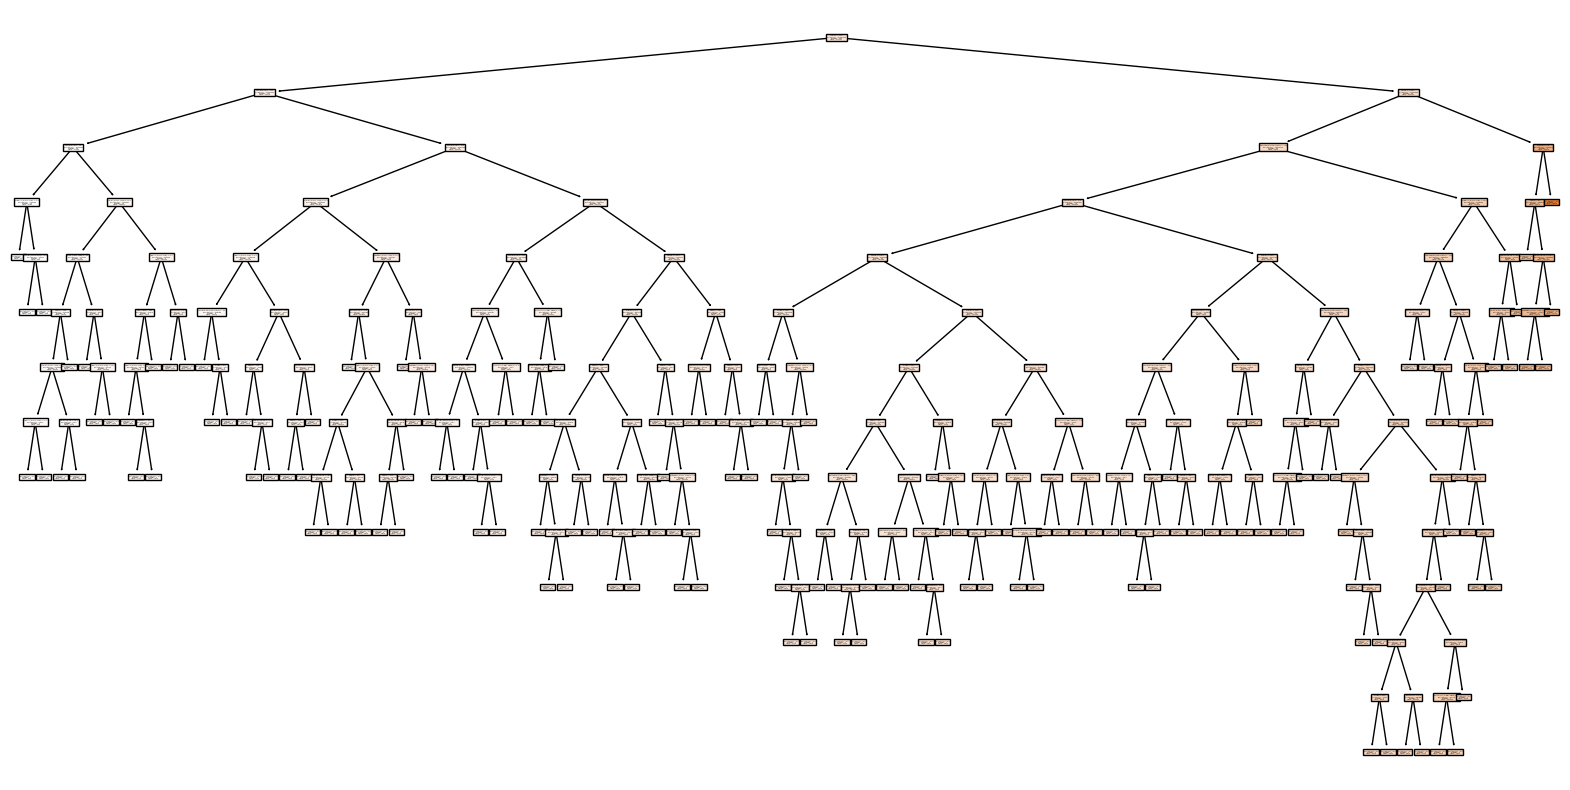

In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import matplotlib.pyplot as plt

# Fit the tree-based model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Interpret the nodes
plt.figure(figsize=(20,10))
tree.plot_tree(tree_model, feature_names=features, filled=True)
plt.show()

In [7]:
pip install tpot

In [8]:
# This code is for demonstration purposes and should be run in a script due to potentially long run times
from tpot import TPOTRegressor

# Initialize TPOT
tpot = TPOTRegressor(generations=5, population_size=20, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)

# Export the best pipeline found by TPOT
tpot.export('best_model_pipeline.py')


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -25.529270865194928

Generation 2 - Current best internal CV score: -25.529270865194928

Generation 3 - Current best internal CV score: -25.529270865194928

Generation 4 - Current best internal CV score: -25.529270865194928

Generation 5 - Current best internal CV score: -25.529270865194928

Best pipeline: RidgeCV(input_matrix)


PermutationExplainer explainer: 53it [00:19,  2.65it/s]


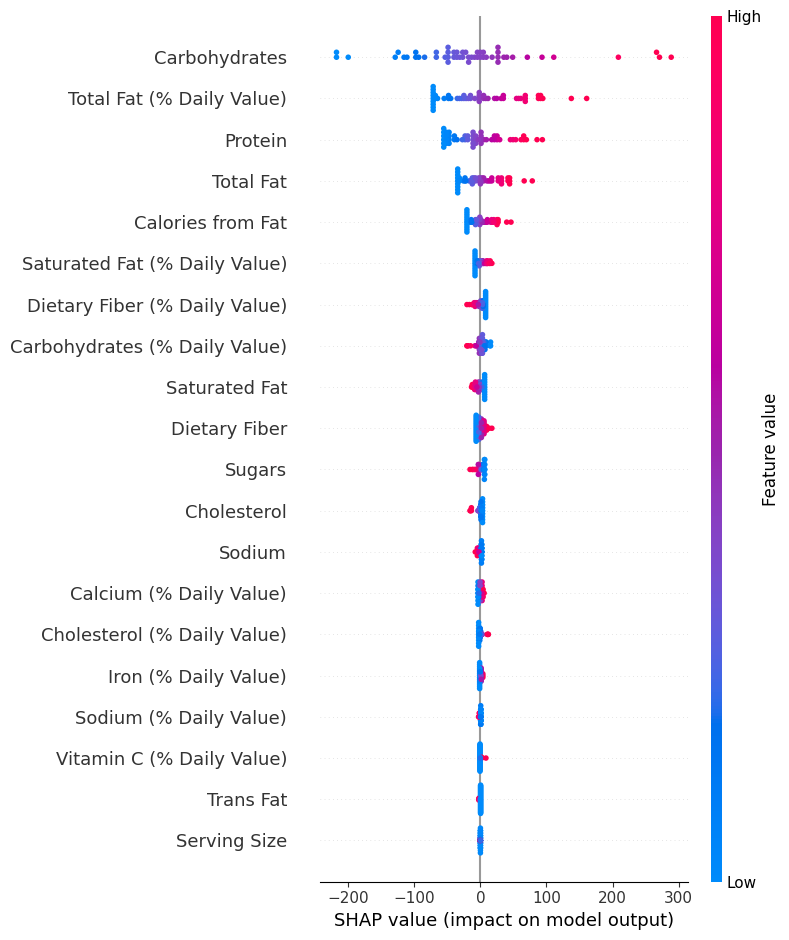

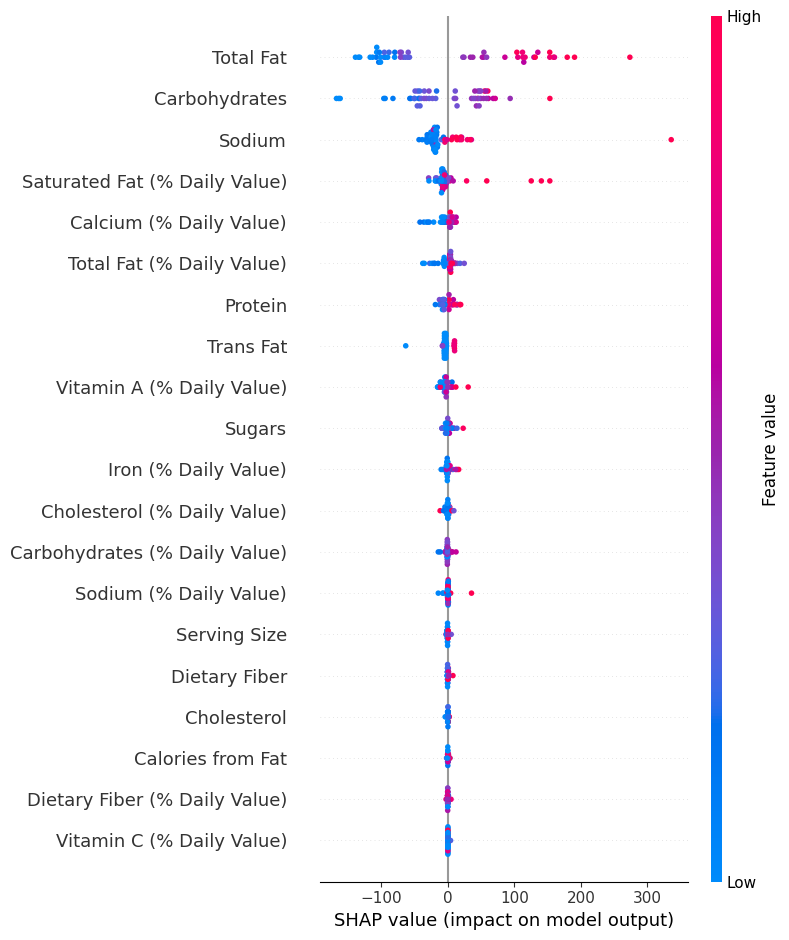

In [9]:
import shap

# SHAP analysis on the linear model
explainer_linear = shap.Explainer(linear_model.predict, X_train)
shap_values_linear = explainer_linear(X_test)
shap.summary_plot(shap_values_linear, X_test)

# SHAP analysis for tree-based models requires TreeExplainer
explainer_tree = shap.Explainer(tree_model.predict, X_train)
shap_values_tree = explainer_tree(X_test)
shap.summary_plot(shap_values_tree, X_test)

# For the model from AutoML (TPOT), we would need to load the best model first
# The approach will depend on the type of model selected by TPOT

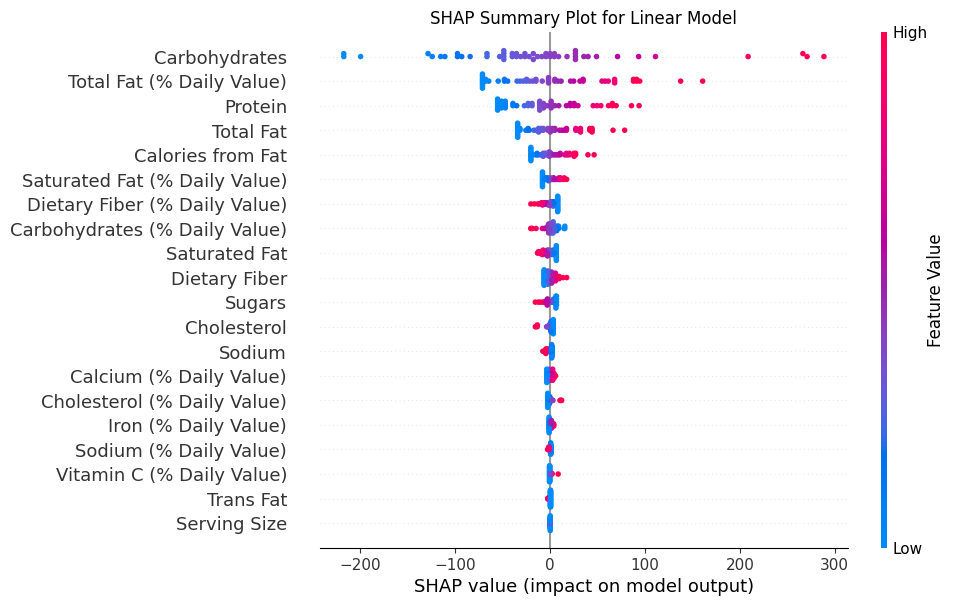

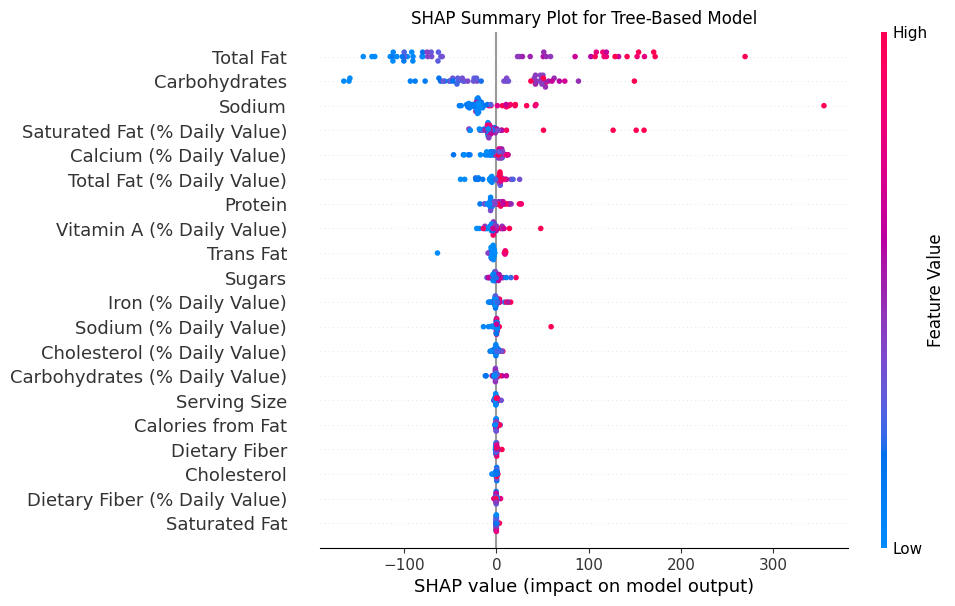

In [10]:
import shap
import matplotlib.pyplot as plt

# SHAP analysis on the linear model
explainer_linear = shap.Explainer(linear_model.predict, X_train)
shap_values_linear = explainer_linear(X_test)

# Customized summary plot for the linear model
plt.figure(figsize=(10, 6))  # Larger figure size
shap.summary_plot(shap_values_linear, X_test, show=False, plot_size=None,
                  color_bar_label='Feature Value',
                  color_bar=True, max_display=20)  # Customize as needed

plt.title('SHAP Summary Plot for Linear Model')  # Title for the plot
plt.show()  # Show the plot

# Similarly, for the tree-based model
explainer_tree = shap.Explainer(tree_model.predict, X_train)
shap_values_tree = explainer_tree(X_test)

# Customized summary plot for the tree-based model
plt.figure(figsize=(10, 6))  # Larger figure size
shap.summary_plot(shap_values_tree, X_test, show=False, plot_size=None,
                  color_bar_label='Feature Value',
                  color_bar=True, max_display=20)  # Customize as needed

plt.title('SHAP Summary Plot for Tree-Based Model')  # Title for the plot
plt.show()  # Show the plot
